This notebook describes basic concepts about video stabilization. We will :


*   justify the need for video stabilization.
*   present examples related to sport that need a pre-processing with this technique before analysis.
*   explain the steps of the stabilization process.
*   present state of the art methods that implement this process.
*   define a performance measure to assess the stabilization method.







# What is video stabilization?
Video stabilization is one of the most fundamental and challenging tasks in video processing, which can be widely applied in many areas, such as video surveillance, robotics, unmanned aerial vehicles and smartphones.

It is ***a video enhancement technology that aims to improve original video quality by removing potentially shaky camera motion.***

For example, drones or satellites need to give in real time good video quality of a given area and any small vibration or destabilization of these engines may result in destabilized outputs which may be then inexploitable.

Stabilization can be :


*   Mechanical : uses a gyroscopic stabilizer (see figure above). The gyro-stabilizer is an invisible tripod embedded in the camera that compensates for the captured video and outputs stabilized videos.
<div style="display: flex; justify-content: center;">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S092523122201270X-gr1_lrg.jpg?raw=true" alt="librosa logo" width="100" />
</div>
<p style="text-align: center; font-style: italic; font-size: 12px;">
  Figure 1 : Gyro-stabilizer: <a href="https://www.sciencedirect.com/science/article/pii/S092523122201270X" target="_blank">ScienceDirect</a>
</p>
*   Optical : used in smartphones and high resolution cameras.
*   Digital :  directly estimates the motion vectors of the successive frames without hardware devices. The shaky component is separated by filtering and removed by motion compensation. Finally, frames are reconstructed by image warp.
<div style="display: flex; justify-content: center;">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S092523122201270X-gr3_lrg.jpg?raw=true" alt="librosa logo" width="400" />
</div>
<p style="text-align: center; font-style: italic; font-size: 12px;">
  Figure 2 : Motion smoothing: <a href="https://www.sciencedirect.com/science/article/pii/S092523122201270X" target="_blank">ScienceDirect</a>
</p>



# Examples

  Here we present some generic transformations that cause video stabilization and examples of sport videos that illustrate them.

***Translation*** : the camera moves along a straight line. In the image below, the table moved from the center of the frame to the left.

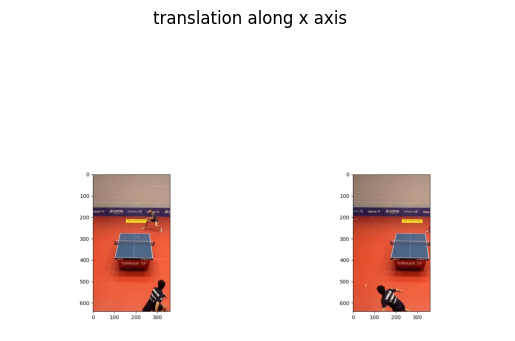

In [8]:
import cv2
import matplotlib.pyplot as plt
frame1=cv2.imread("Figure_1.png")
frame2=cv2.imread("Figure_2.png")
fig, axes = plt.subplots(1, 2)
fig.suptitle("translation along x axis")
# Plot the first image
axes[0].imshow(frame1)
axes[0].axis('off')

# Plot the second image
axes[1].imshow(frame2)
axes[1].axis('off')

# Adjust spacing between the images
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()

 ***Zoom*** : the camera is zooming on the table. This transformation makes the annotation tool developed by the team to calculate the position of the ball bounce inaccurate.

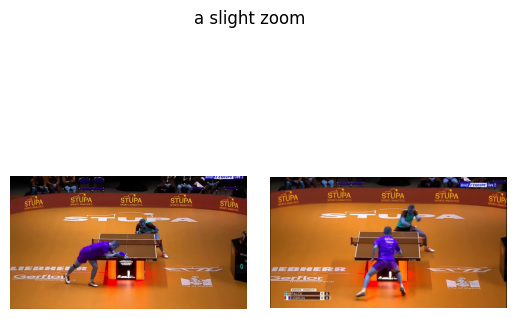

In [18]:
frame1=cv2.imread("frame0.png")
frame2=cv2.imread("zoom.png")
fig, axes = plt.subplots(1, 2)
fig.suptitle("a slight zoom")
# Plot the first image
axes[0].imshow(frame1)
axes[0].axis('off')

# Plot the second image
axes[1].imshow(frame2)
axes[1].axis('off')

# Adjust spacing between the images
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()


***Random Vibration*** : the camera motion is a random displacement.

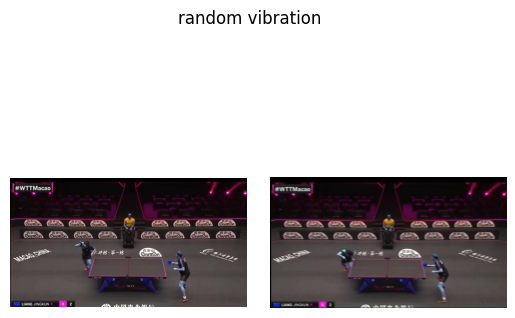

In [13]:
frame1=cv2.imread("frame4.png")
frame2=cv2.imread("frame.png")
fig, axes = plt.subplots(1, 2)
fig.suptitle("random vibration")
# Plot the first image
axes[0].imshow(frame1)
axes[0].axis('off')

# Plot the second image
axes[1].imshow(frame2)
axes[1].axis('off')

# Adjust spacing between the images
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()

# Steps of stabilization process
Digital video stabilization usually employs a “three-step” approach :  
 * motion estimation : establish a motion model and estimating the global motion vectors.
 * motion compensation : the motion model is used to remove the shaking to produce stable camera motion.
 * image warp : performed on the generated stable camera path. it warps the frames to gain visually smooth inter-frame motion.

 <div style="display: flex; justify-content: center;">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S092523122201270X-gr4_lrg.jpg?raw=true" alt="librosa logo" width="500" />
</div>
<p style="text-align: center; font-style: italic; font-size: 12px;">
  Figure 3 : Diagram of video stabilization algorithm: <a href="https://www.sciencedirect.com/science/article/pii/S092523122201270X" target="_blank">ScienceDirect</a>
</p>

# State of the art methods

Finally, we present some state of the art methods that implement video stabilization. We will explore these methods and assess their performance on some examples  :


*   DAVINCI RESOLVE : a framework for video processing in general that uses many algorithms and zoom parameters in order to stabilize videos.
*   VidStab : python package that implements the diagram above and that allows tuning parameters like cropping ratio, frames deformation ratio.

*  Opencv : python package that allows to compute transformations between two different frames based on tracked features (feature matching). We use the displacement  of these features of interest to wrap frames.

*  vidtsabgui : A simple graphical user interface for the VidStab video stabilization library (https://github.com/hlorand/vidstabgui). It allows a large variety of parameters' choice and uses two different algorithms for motion smoothing : gaussian filter to remove high frequency motion or averaging on all transformations.



#Performance measure

We can use the following metrics in order to compare the methods :


*   ***Displacement of tracked features*** : after stabilization process, we caculate the displacement between the pixels of tracked features in frame n and frame 0  (reference). The best method is the method having the smallest average displacement all along the video considered.

*   ***Cropping ratio*** : stabilization methods in general need to crop videos and loose information. We need to maximize this value.

*   ***Distortion Value*** :this metric measures the deformation of frames with respect to the reference frame.



The next example shows the choice of tracked features (4 corners of the table tennis table) and the displacement between the frame of reference (left) and the frame on the right.

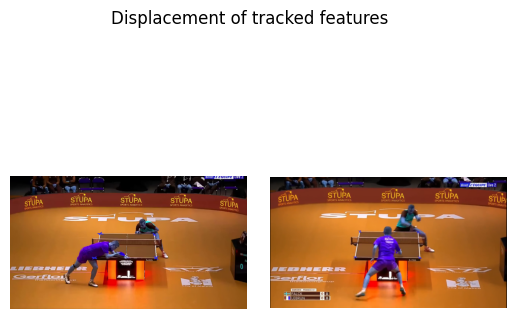

In [19]:
frame1=cv2.imread("frame5.png")
frame2=cv2.imread("frame6.png")
fig, axes = plt.subplots(1, 2)
fig.suptitle("Displacement of tracked features")
# Plot the first image
axes[0].imshow(frame1)
axes[0].axis('off')

# Plot the second image
axes[1].imshow(frame2)
axes[1].axis('off')

# Adjust spacing between the images
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()


In the case of tennis table, we will use the following formula for the displacement of tracked features :

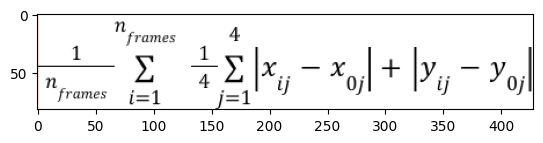

In [21]:
frame=cv2.imread("formula.png")
plt.imshow(frame)
plt.show()